<a href="https://colab.research.google.com/github/aliu-7/Molecular-Property-Prediction-and-Optimization/blob/main/4_1_2_Understanding_How_RNNs_Interpret_Molecular_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies (if needed)
!pip install -q rdkit pandas scikit-learn tensorflow

# Load the BBBP dataset
import pandas as pd
url = "https://raw.githubusercontent.com/Data-Chemist-Handbook/Data-Chemist-Handbook.github.io/refs/heads/master/_pages/BBBP.csv"
data = pd.read_csv(url)

# Tokenize SMILES
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

smiles_list = data['smiles']
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(smiles_list)

# Create vocab_size for embedding
vocab_size = len(tokenizer.word_index) + 1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 54.4 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


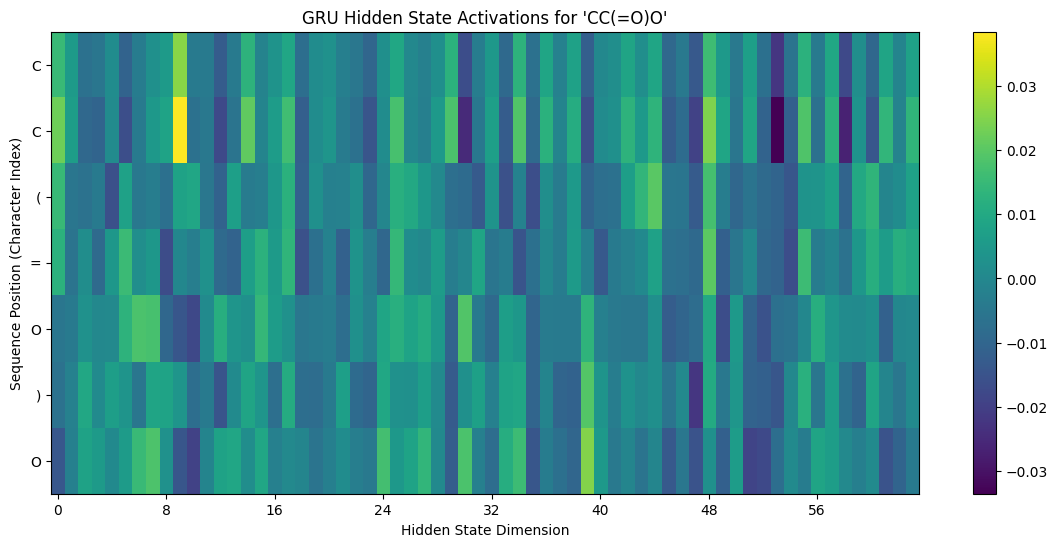

In [ ]:
# Your visualization code
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Prepare test input
test_smiles = ['CC(=O)O']
test_seq = tokenizer.texts_to_sequences(test_smiles)
test_pad = pad_sequences(test_seq, padding='post', maxlen=120)

# Define GRU model to return all hidden states
input_layer = Input(shape=(120,))
embed_layer = Embedding(input_dim=vocab_size, output_dim=32)(input_layer)
gru_layer, state_seq = GRU(units=64, return_sequences=True, return_state=True)(embed_layer)

# Build model and predict
intermediate_model = Model(inputs=input_layer, outputs=gru_layer)
hidden_states = intermediate_model.predict(test_pad)

# Plot hidden state activations
plt.figure(figsize=(14, 6))
plt.imshow(hidden_states[0][:len(test_seq[0])], aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("GRU Hidden State Activations for 'CC(=O)O'")
plt.xlabel("Hidden State Dimension")
plt.ylabel("Sequence Position (Character Index)")
plt.xticks(np.arange(0, 64, 8))
plt.yticks(np.arange(len(test_seq[0])), labels=list(test_smiles[0]))
plt.show()
